In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
df_music = pd.read_csv(r'C:\Users\DEBAPRIYA GHOSH\Downloads\data.csv') 

In [7]:
df_music.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [11]:
df_music.shape

(1000, 30)

In [15]:
df_music.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [17]:
df_music = df_music.sample(frac=1).reset_index(drop ='True') #shuffle dataset columns

In [19]:
df_music.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,metal.00079.au,123.046875,61,0.472494,0.127355,2710.014596,2264.068282,5322.626148,0.143906,-74.899408,...,15.470462,-11.140673,10.471946,-6.382416,5.546656,-7.289397,2.913024,-0.568095,-2.834682,metal
1,rock.00057.au,123.046875,62,0.390089,0.122628,3489.009117,3241.742261,7660.553678,0.175103,-58.575879,...,-0.725304,-0.318134,-1.482422,3.299134,3.647733,-2.511937,-1.169254,-2.308449,-2.213438,rock
2,country.00093.au,86.132812,42,0.250902,0.092585,1537.614201,1716.081352,3054.864861,0.068124,-213.567469,...,-1.150015,-10.305500,-4.049726,-6.637212,-5.421159,-9.715488,-3.204672,-4.448883,-9.154215,country
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,classical.00049.au,103.359375,53,0.311587,0.123812,2224.870164,2274.309912,4467.431319,0.109446,-98.323293,...,0.627076,-2.591273,-1.470525,-3.170650,0.657626,-4.816374,-2.217762,-3.808980,0.233789,classical


In [21]:
genere_unique = df_music.label.unique()

In [25]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
     

In [41]:
genere_dic ={}
k=0
for element in genere_unique:
    genere_dic[element]=k
    k += 1
    

In [43]:
print(genere_dic)

{'metal': 0, 'rock': 1, 'country': 2, 'blues': 3, 'classical': 4, 'disco': 5, 'hiphop': 6, 'pop': 7, 'jazz': 8, 'reggae': 9}


In [47]:
df_music = df_music.replace({'label' : genere_dic})
df_music.head()

C:\Users\DEBAPRIYA GHOSH\AppData\Local\Temp\ipykernel_20880\632785158.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_music = df_music.replace({'label' : genere_dic})


,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,metal.00079.au,123.046875,61,0.472494,0.127355,2710.014596,2264.068282,5322.626148,0.143906,-74.899408,...,15.470462,-11.140673,10.471946,-6.382416,5.546656,-7.289397,2.913024,-0.568095,-2.834682,0
1,rock.00057.au,123.046875,62,0.390089,0.122628,3489.009117,3241.742261,7660.553678,0.175103,-58.575879,...,-0.725304,-0.318134,-1.482422,3.299134,3.647733,-2.511937,-1.169254,-2.308449,-2.213438,1
2,country.00093.au,86.132812,42,0.250902,0.092585,1537.614201,1716.081352,3054.864861,0.068124,-213.567469,...,-1.150015,-10.305500,-4.049726,-6.637212,-5.421159,-9.715488,-3.204672,-4.448883,-9.154215,2
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,3
4,classical.00049.au,103.359375,53,0.311587,0.123812,2224.870164,2274.309912,4467.431319,0.109446,-98.323293,...,0.627076,-2.591273,-1.470525,-3.170650,0.657626,-4.816374,-2.217762,-3.808980,0.233789,4


In [49]:
import seaborn as sns

In [55]:
import random

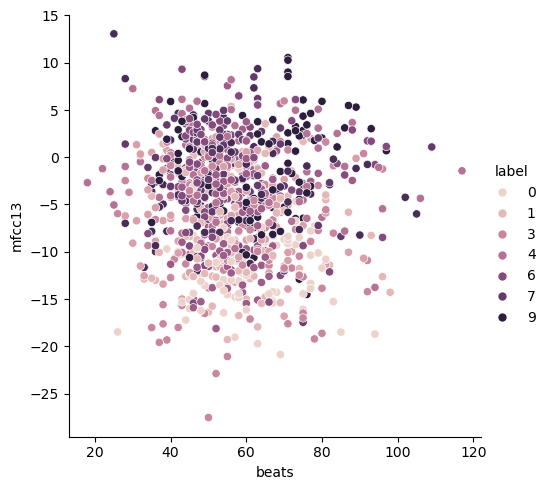

In [61]:
feature_names = df_music.keys()[:-1]
x_name = random.choice(feature_names)
y_name = random.choice(feature_names)
while x_name==y_name:
      yname = random.choice(feature_names)
sns.relplot(x=x_name, y=y_name, hue='label', data= df_music)

In [63]:
df_mod = df_music.copy()

In [71]:
df_mod['beats']= df_mod['beats'].astype(float)

In [73]:
non_numbers=[]
for col in df_mod.iloc[:, :-1]:
    if(df_mod[col].dtype != "float64"):
       non_numbers.append(col)
    
print(non_numbers)
    

['filename']


In [75]:
df_mod = df_mod.drop(columns= non_numbers)

In [77]:
df_mod.shape

(1000, 29)

In [98]:
L = len(df_mod.columns)
scaler = preprocessing.MinMaxScaler()
df_mod.iloc[:,:L-1] = scaler.fit_transform(df_mod.iloc[:,:L-1].values)

In [100]:
df_mod.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.378307,0.434343,0.611463,0.310842,0.553779,0.523082,0.576935,0.482780,0.803174,0.414471,...,0.805186,0.404015,0.750013,0.373308,0.728344,0.346070,0.544279,0.540389,0.484377,0.000000
1,0.378307,0.444444,0.443903,0.298808,0.755356,0.897443,0.871855,0.606025,0.830650,0.341262,...,0.388230,0.670602,0.361385,0.697073,0.663228,0.512430,0.395045,0.487954,0.501974,0.111111
2,0.173148,0.242424,0.160880,0.222311,0.250403,0.313253,0.290867,0.183398,0.569765,0.610181,...,0.377295,0.424587,0.277923,0.364787,0.352249,0.261590,0.320638,0.423466,0.305374,0.222222
3,0.720238,0.737374,0.198332,0.289752,0.204713,0.256477,0.251101,0.187349,0.580469,0.690185,...,0.391114,0.687919,0.494268,0.413220,0.211441,0.277994,0.333666,0.514761,0.396627,0.333333
4,0.268889,0.353535,0.284277,0.301822,0.428241,0.527004,0.469056,0.346645,0.763747,0.513217,...,0.423046,0.614608,0.361771,0.480714,0.560695,0.432185,0.356715,0.442745,0.571292,0.444444


In [102]:
df_mod['label']= df_music['label'].astype(int)

In [104]:
df_mod.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.378307,0.434343,0.611463,0.310842,0.553779,0.523082,0.576935,0.482780,0.803174,0.414471,...,0.805186,0.404015,0.750013,0.373308,0.728344,0.346070,0.544279,0.540389,0.484377,0
1,0.378307,0.444444,0.443903,0.298808,0.755356,0.897443,0.871855,0.606025,0.830650,0.341262,...,0.388230,0.670602,0.361385,0.697073,0.663228,0.512430,0.395045,0.487954,0.501974,1
2,0.173148,0.242424,0.160880,0.222311,0.250403,0.313253,0.290867,0.183398,0.569765,0.610181,...,0.377295,0.424587,0.277923,0.364787,0.352249,0.261590,0.320638,0.423466,0.305374,2
3,0.720238,0.737374,0.198332,0.289752,0.204713,0.256477,0.251101,0.187349,0.580469,0.690185,...,0.391114,0.687919,0.494268,0.413220,0.211441,0.277994,0.333666,0.514761,0.396627,3
4,0.268889,0.353535,0.284277,0.301822,0.428241,0.527004,0.469056,0.346645,0.763747,0.513217,...,0.423046,0.614608,0.361771,0.480714,0.560695,0.432185,0.356715,0.442745,0.571292,4


In [106]:
X = df_mod[df_mod.columns[:-1]] #select all the columns except genere
Y = df_mod['label'] #the output genere value

In [108]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state = 42)

In [114]:
y_train.shape


(700,)

In [116]:
from sklearn.svm import SVC

In [118]:
svm_model = SVC(kernel='rbf', gamma=0.1, C=1)
svm_model.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [122]:
y_pred = svm_model.predict(X_test)

In [128]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.83      0.58        18
           1       0.00      0.00      0.00        15
           2       0.40      0.12      0.18        17
           3       0.28      0.56      0.38        16
           4       0.88      0.83      0.86        18
           5       0.50      0.06      0.11        17
           6       0.33      0.22      0.27         9
           7       0.53      0.94      0.68        17
           8       0.25      0.40      0.31        10
           9       0.43      0.23      0.30        13

    accuracy                           0.45       150
   macro avg       0.41      0.42      0.37       150
weighted avg       0.43      0.45      0.38       150



In [132]:
#linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [136]:
y_linear_pred = svm_linear.predict(X_test)
print(classification_report(y_test, y_linear_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        18
           1       0.44      0.27      0.33        15
           2       0.46      0.35      0.40        17
           3       0.34      0.62      0.44        16
           4       1.00      0.83      0.91        18
           5       0.50      0.47      0.48        17
           6       0.29      0.22      0.25         9
           7       0.79      0.88      0.83        17
           8       0.36      0.50      0.42        10
           9       0.60      0.46      0.52        13

    accuracy                           0.55       150
   macro avg       0.54      0.53      0.53       150
weighted avg       0.57      0.55      0.55       150



In [142]:
from sklearn.metrics import confusion_matrix

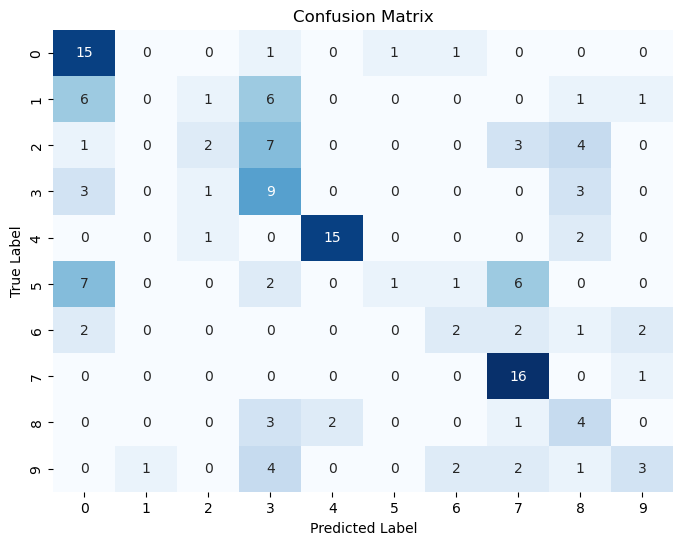

In [144]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

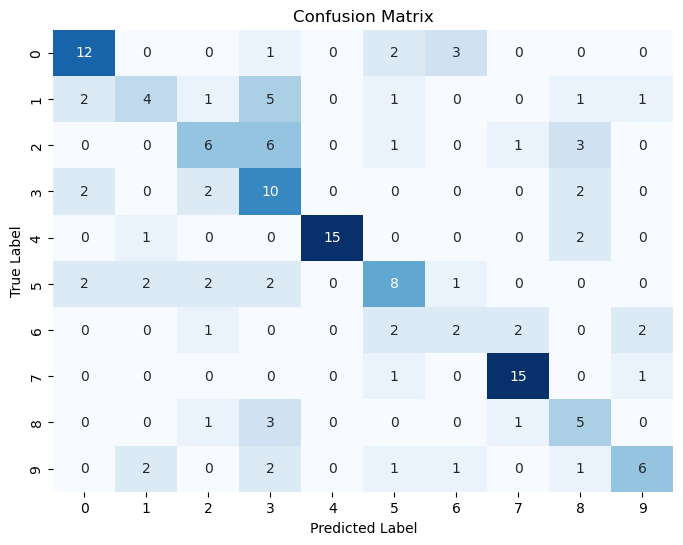

In [148]:
cm = confusion_matrix(y_test, y_linear_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [152]:
acc = cross_val_score(svm_linear, X, Y, cv=10)
acc = acc.mean()
print(acc)

0.589


In [156]:
acc_n = cross_val_score(svm_model, X, Y, cv=10)
acc_n = acc_n.mean()
print(acc_n)

0.476
